In [1]:
%pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5d/12/6522f3de83ca690aa52f4b8c88a1e203abb1e2d75c31669dc004949143cd/cmdstanpy-1.2.4-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/0f/69/fa78950f99c0add5222f693d13b987b642aa778bca63fb9aaaca365be16c/holidays-0.58-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/e1/6a/4604f9ae2fa62ef47b9de2fa5ad599589d28c9fd1d335f32759813dfa91e/importlib_resources-6.4.5-py3-none-any.whl.metadata
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [2]:
# Load the dataset
data = pd.read_csv("worldometer_coronavirus_daily_data.csv")

# Filter data for India
india_data = data[data["country"] == "India"].copy()

# Convert 'date' to datetime and rename columns for Prophet
india_data["date"] = pd.to_datetime(india_data["date"])
india_data.rename(columns={"date": "ds", "cumulative_total_cases": "y"}, inplace=True)

# Select relevant columns (you can choose to fill missing values)
india_data = india_data[["ds", "y"]].dropna()

# Optional: Fill missing values with the last available value (forward fill)
india_data["y"].fillna(method="ffill", inplace=True)

# Display the first few rows
print(india_data.head())


              ds    y
77104 2020-02-15  3.0
77105 2020-02-16  3.0
77106 2020-02-17  3.0
77107 2020-02-18  3.0
77108 2020-02-19  3.0


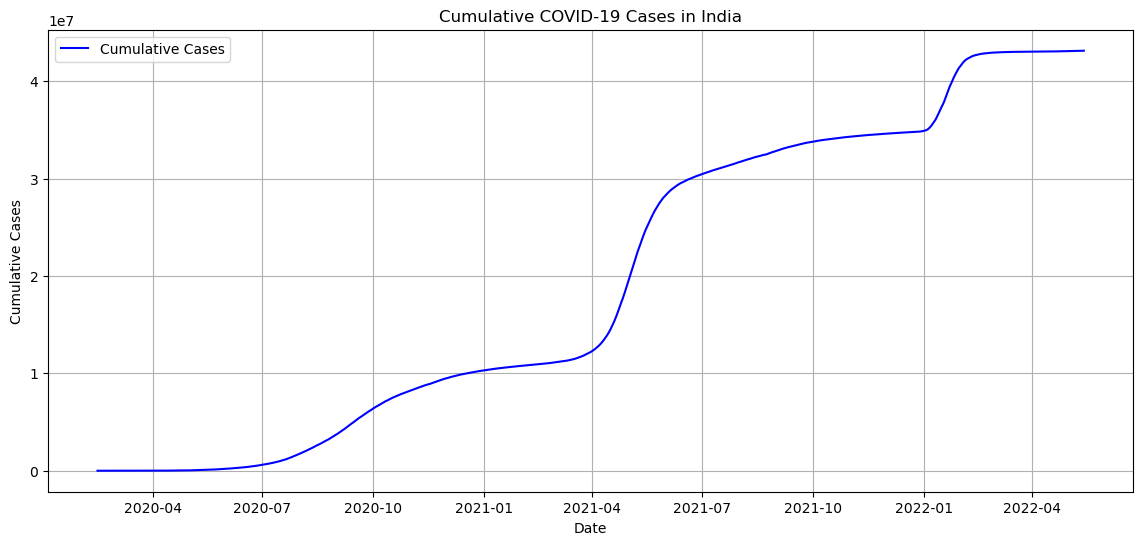

In [3]:
plt.figure(figsize=(14, 6))
plt.plot(india_data["ds"], india_data["y"], label="Cumulative Cases", color="blue")
plt.title("Cumulative COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.grid()
plt.show()


In [4]:
# Initialize the Prophet model
model = Prophet(
    daily_seasonality=True,  # Enable daily seasonality if applicable
    yearly_seasonality=True,  # Enable yearly seasonality if applicable
)

# Fit the model to the data
model.fit(india_data)


18:36:23 - cmdstanpy - INFO - Chain [1] start processing
18:36:23 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select actual values for the evaluation period
actual = india_data["y"][-30:].values  # Last 30 actual values
predicted = forecast["yhat"][-30:].values  # Last 30 predicted values

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(actual, predicted))
mae = mean_absolute_error(actual, predicted)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 415535.46823527757
MAE: 350147.4665607127


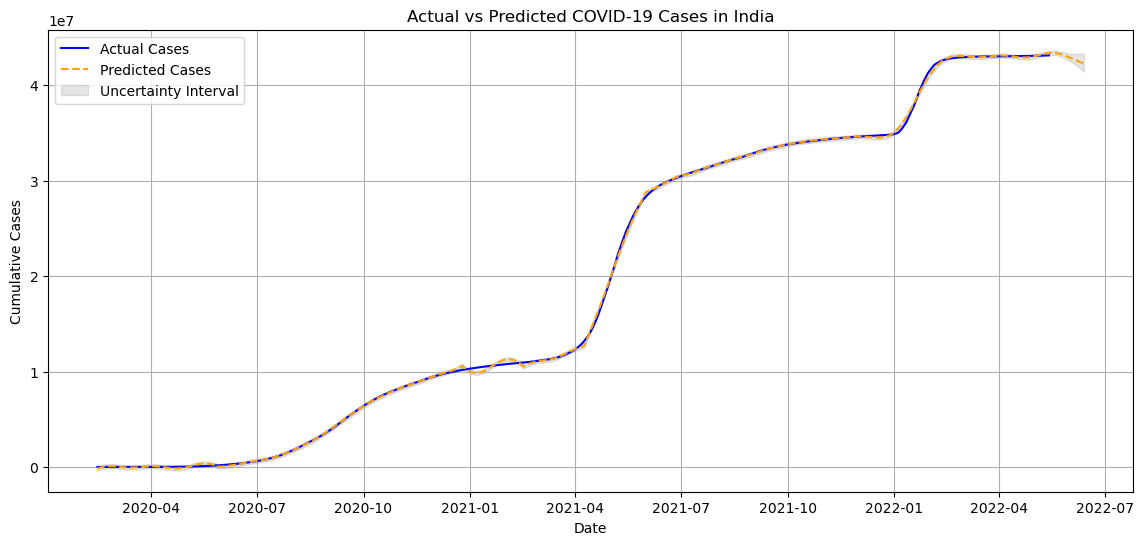

In [8]:
# Plot the actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(india_data["ds"], india_data["y"], label="Actual Cases", color="blue")
plt.plot(
    forecast["ds"],
    forecast["yhat"],
    label="Predicted Cases",
    color="orange",
    linestyle="dashed",
)
plt.fill_between(
    forecast["ds"],
    forecast["yhat_lower"],
    forecast["yhat_upper"],
    color="gray",
    alpha=0.2,
    label="Uncertainty Interval",
)
plt.title("Actual vs Predicted COVID-19 Cases in India")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.legend()
plt.grid()
plt.show()


In [5]:
# Create a DataFrame for future dates (e.g., 30 days ahead)
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Display the forecast
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()


,ds,yhat,yhat_lower,yhat_upper
845,2022-06-09,4.246456e+07,4.183394e+07,4.329525e+07
846,2022-06-10,4.241800e+07,4.172014e+07,4.329107e+07
847,2022-06-11,4.237357e+07,4.161987e+07,4.328301e+07
848,2022-06-12,4.232736e+07,4.148804e+07,4.336075e+07
849,2022-06-13,4.227349e+07,4.143917e+07,4.327314e+07


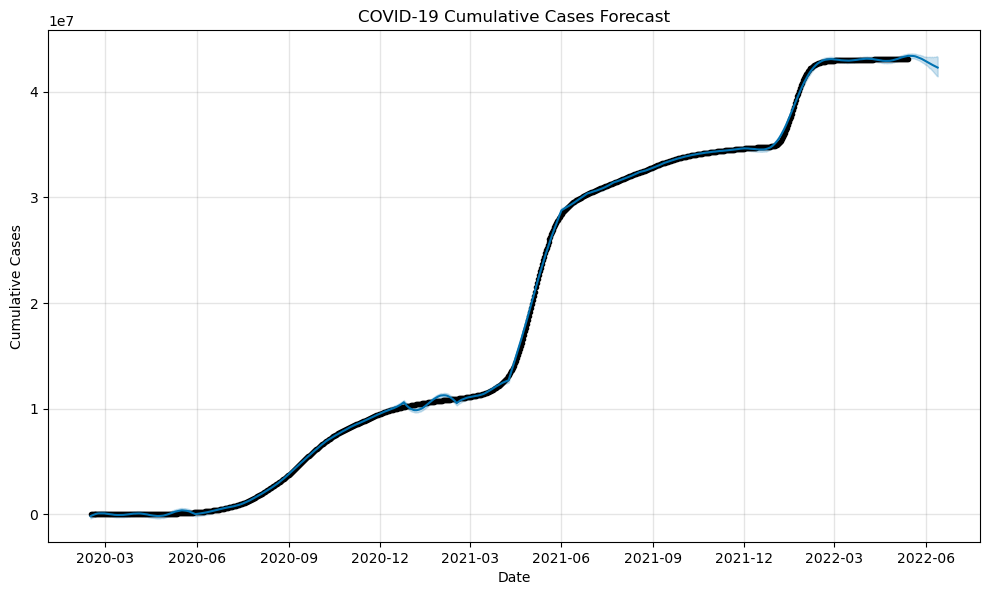

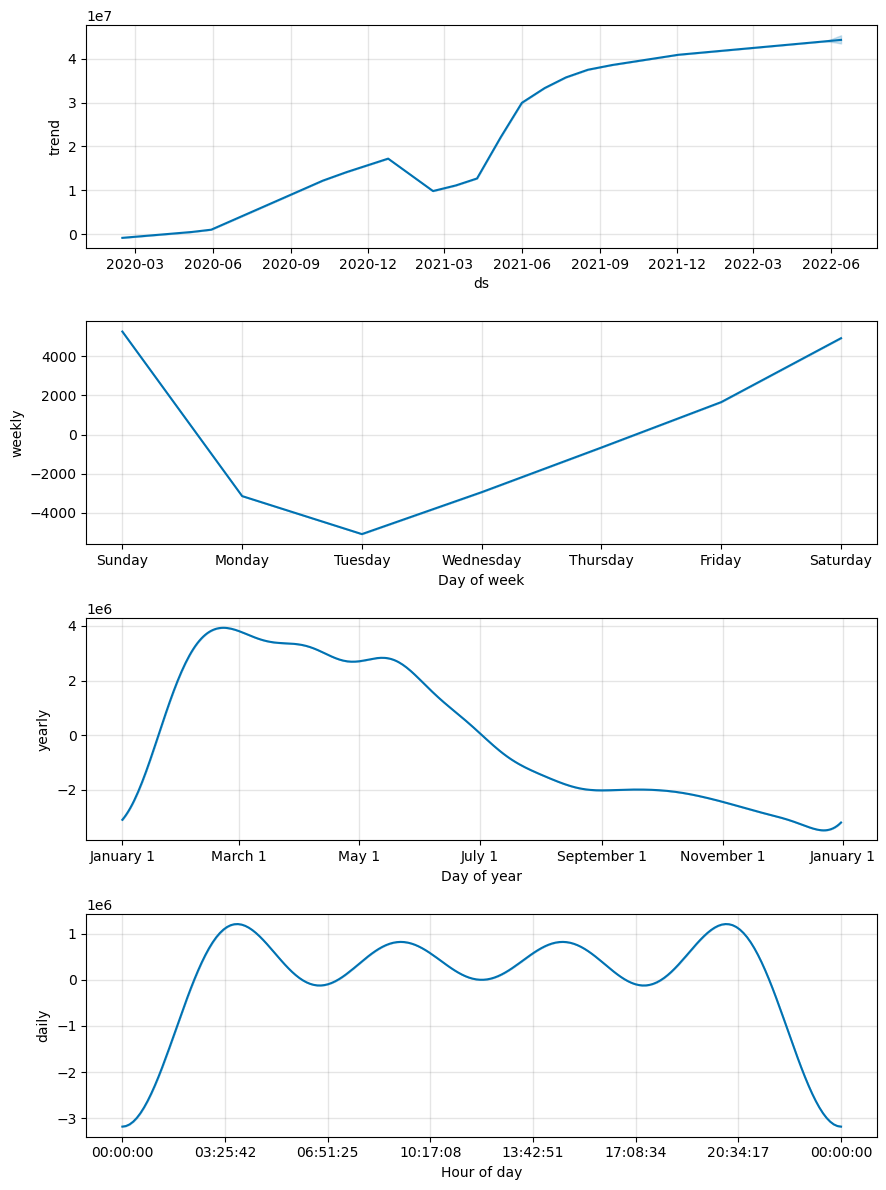

In [6]:
# Plot the results
fig = model.plot(forecast)
plt.title("COVID-19 Cumulative Cases Forecast")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.show()

# Plot forecast components (trend, yearly seasonality, etc.)
fig2 = model.plot_components(forecast)


18:52:30 - cmdstanpy - INFO - Chain [1] start processing
18:52:44 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/53 [00:00<?, ?it/s]

18:53:04 - cmdstanpy - INFO - Chain [1] start processing
18:53:04 - cmdstanpy - INFO - Chain [1] done processing
18:53:07 - cmdstanpy - INFO - Chain [1] start processing
18:53:11 - cmdstanpy - INFO - Chain [1] done processing
18:53:14 - cmdstanpy - INFO - Chain [1] start processing
18:53:19 - cmdstanpy - INFO - Chain [1] done processing
18:53:23 - cmdstanpy - INFO - Chain [1] start processing
18:53:25 - cmdstanpy - INFO - Chain [1] done processing
18:53:30 - cmdstanpy - INFO - Chain [1] start processing
18:53:33 - cmdstanpy - INFO - Chain [1] done processing
18:53:39 - cmdstanpy - INFO - Chain [1] start processing
18:53:40 - cmdstanpy - INFO - Chain [1] done processing
18:53:46 - cmdstanpy - INFO - Chain [1] start processing
18:53:47 - cmdstanpy - INFO - Chain [1] done processing
18:53:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:54 - cmdstanpy - INFO - Chain [1] done processing
18:54:01 - cmdstanpy - INFO - Chain [1] start processing
18:54:02 - cmdstanpy - INFO - Chain [1]

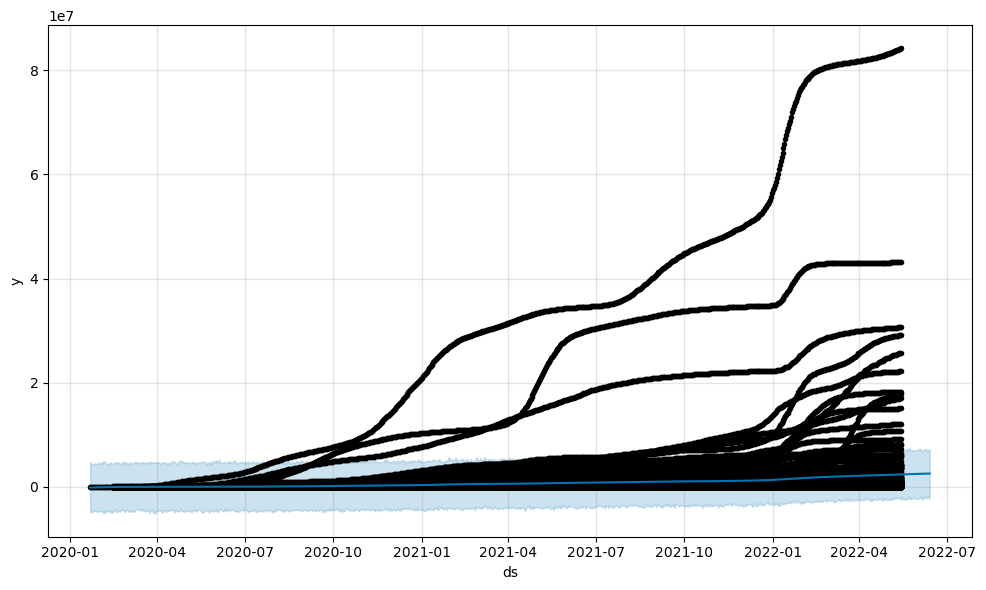

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation

# Load your dataset
df = pd.read_csv("worldometer_coronavirus_daily_data.csv")

# Preprocess data
df["ds"] = pd.to_datetime(df["date"])
df["y"] = df["cumulative_total_cases"]

# Define holidays
holidays = pd.DataFrame(
    {
        "holiday": "holiday_name",
        "ds": pd.to_datetime(["2020-04-01", "2021-01-01"]),  # Add relevant dates
        "lower_window": 0,
        "upper_window": 1,
    }
)

# Initialize and fit the model
model = Prophet(changepoint_prior_scale=0.5, holidays=holidays)
model.fit(df)

# Make future predictions
future = model.make_future_dataframe(periods=30)  # Extend for 30 days
forecast = model.predict(future)

# Cross-validation
df_cv = cross_validation(model, initial="30 days", period="15 days", horizon="30 days")

# Plot results
fig1 = model.plot(forecast)
